In [1]:
import os
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Skipping, found downloaded files in ".\rossmann-store-sales" (use force=True to force download)


In [3]:
os.listdir("rossmann-store-sales")

['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']

In [4]:
train= pd.read_csv("./rossmann-store-sales/train.csv", low_memory= False)
store= pd.read_csv("./rossmann-store-sales/store.csv")
test= pd.read_csv("./rossmann-store-sales/test.csv")
submission= pd.read_csv("./rossmann-store-sales/sample_submission.csv")

In [5]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
submission.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [8]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
merge= train.merge(store, how= "left", on= "Store")
merge_test= test.merge(store, how= "left", on= "Store")

In [10]:
merge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


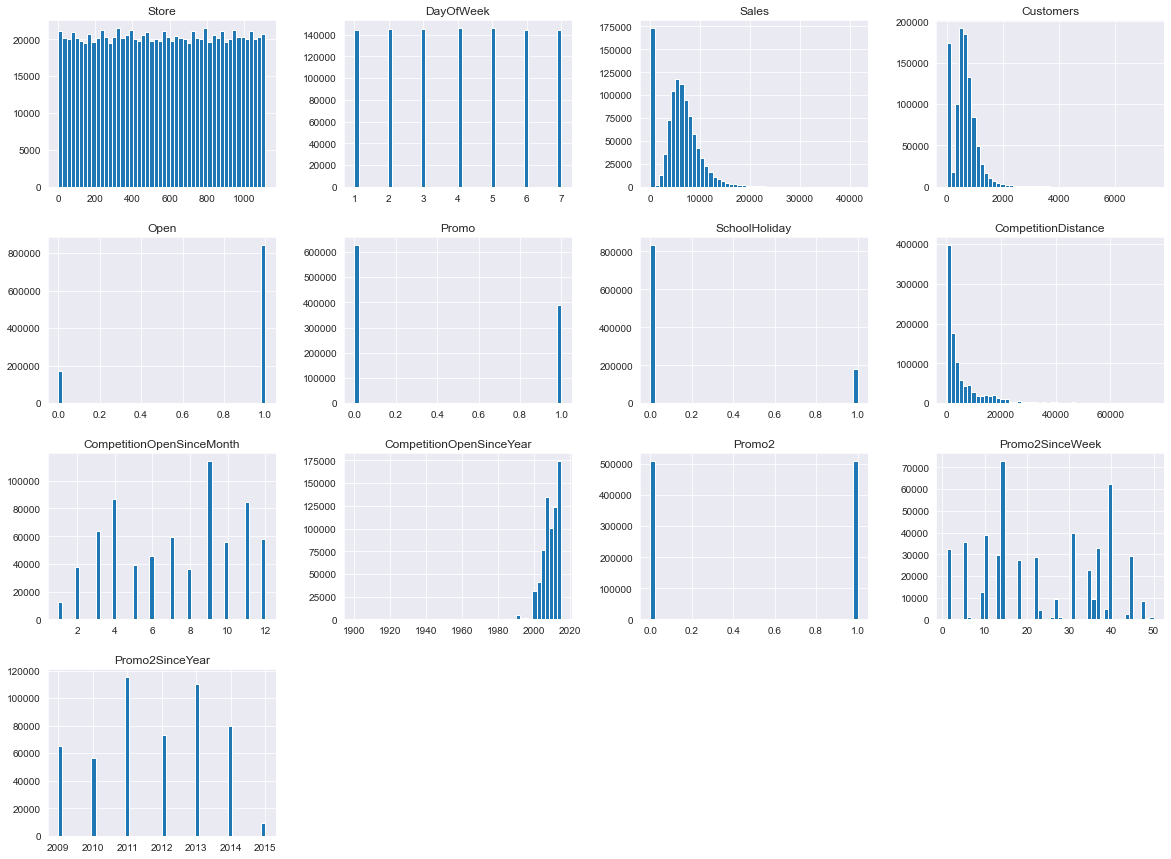

In [11]:
merge.hist(bins= 50, figsize= (20,15))
plt.show()

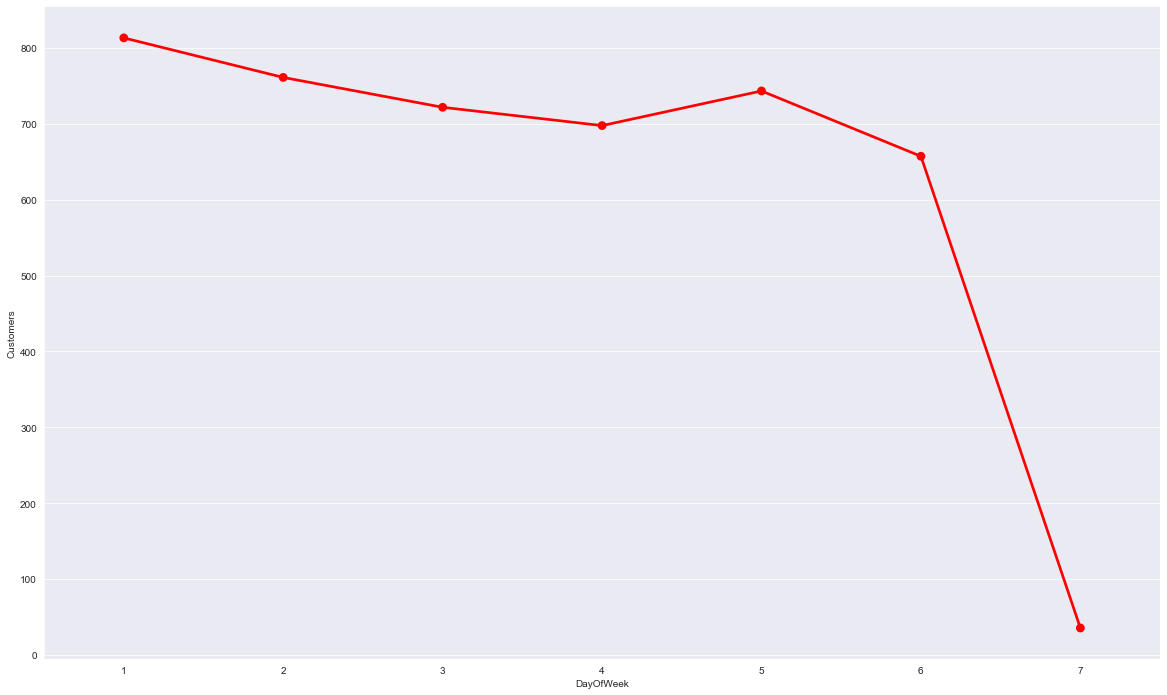

In [12]:
plt.figure(figsize=(20,12))
sns.pointplot(data= merge,
             x= "DayOfWeek",
             y= "Customers",
             color= "red");

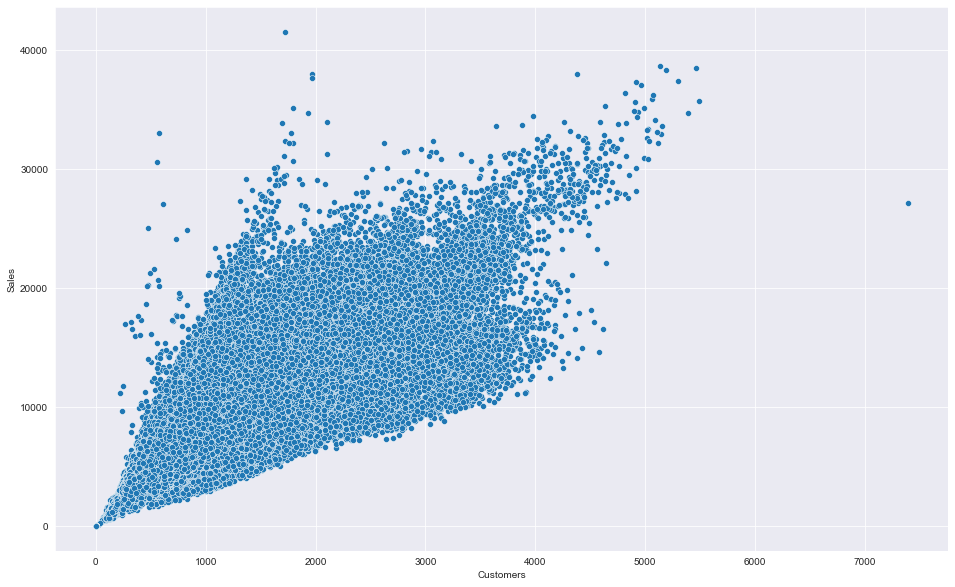

In [13]:
plt.figure(figsize=(16,10))
sns.scatterplot(data= merge,
             x= "Customers",
             y= "Sales");

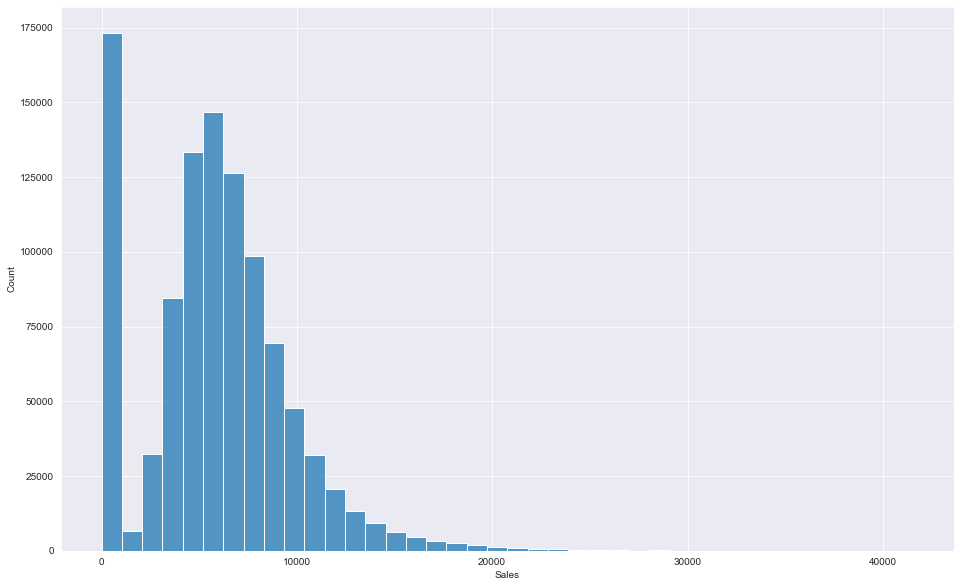

In [15]:
plt.figure(figsize=(16,10))
sns.histplot(data= merge,
             x= "Sales",
            bins= 40);

In [15]:
merge["StoreType"].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [16]:
merge["StoreType"].value_counts().keys()

Index(['a', 'd', 'c', 'b'], dtype='object')

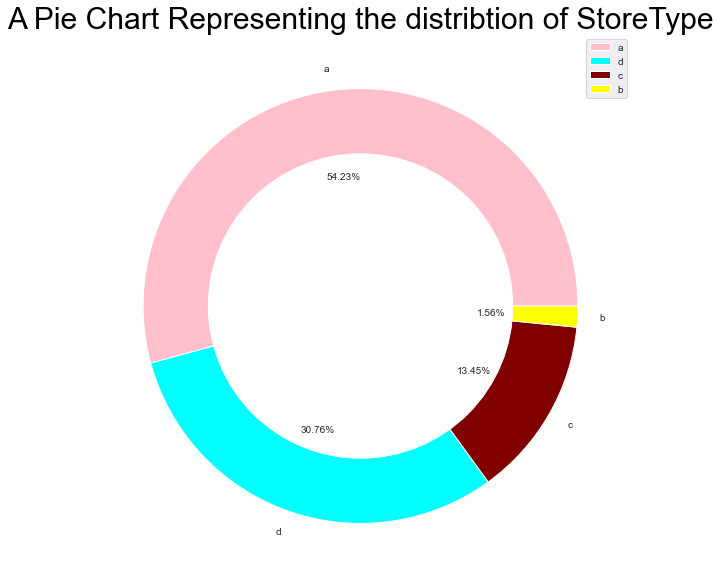

In [17]:
size= [551627, 312912, 136840, 15830]
colors= ['pink', 'cyan', 'maroon',  'yellow']
labels= "a", "d", "c", "b"
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.rcParams["figure.figsize"]= (10,10)
plt.pie(size, colors=colors, labels= labels, autopct= "%.2f%%")
plt.axis("off")
plt.title('A Pie Chart Representing the distribtion of StoreType', fontsize = 30,  color= "black")
p= plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.legend()
plt.show()

In [18]:
merge["Assortment"].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [19]:
merge["Assortment"].value_counts().keys()

Index(['a', 'c', 'b'], dtype='object')

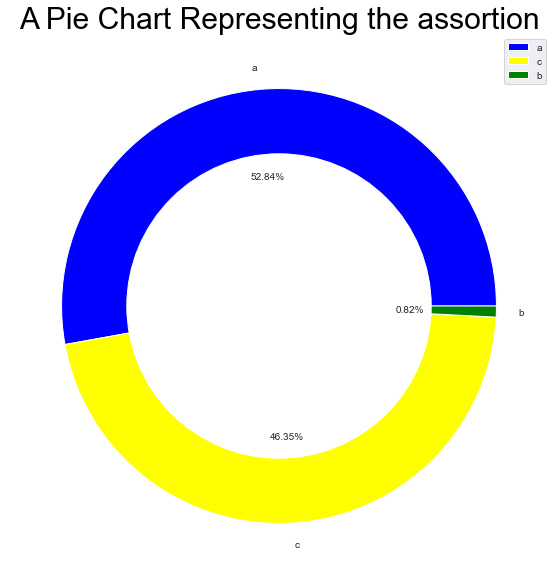

In [20]:
size= [537445, 471470, 8294]
colors= ['blue', 'yellow', 'green']
labels= "a", "c", "b"
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.rcParams["figure.figsize"]= (10,10)
plt.pie(size, colors=colors, labels= labels, autopct= "%.2f%%")
plt.axis("off")
plt.title('A Pie Chart Representing the assortion', fontsize = 30,  color= "black")
p= plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.legend()
plt.show()

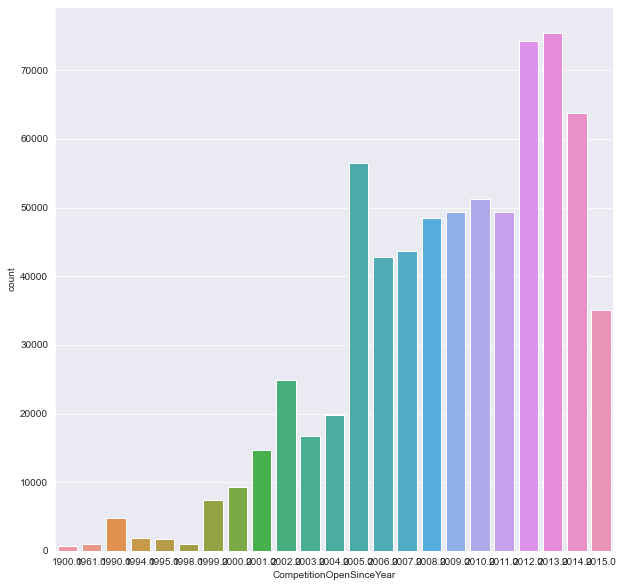

In [21]:
sns.countplot(data= merge,
        x= "CompetitionOpenSinceYear")
plt.show()

<AxesSubplot:xlabel='StateHoliday', ylabel='count'>

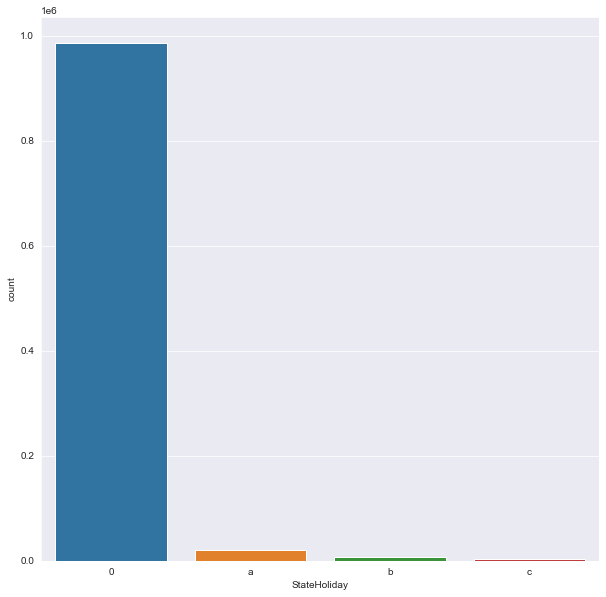

In [22]:
sns.countplot(data= merge, 
             x= "StateHoliday")

<AxesSubplot:xlabel='SchoolHoliday', ylabel='count'>

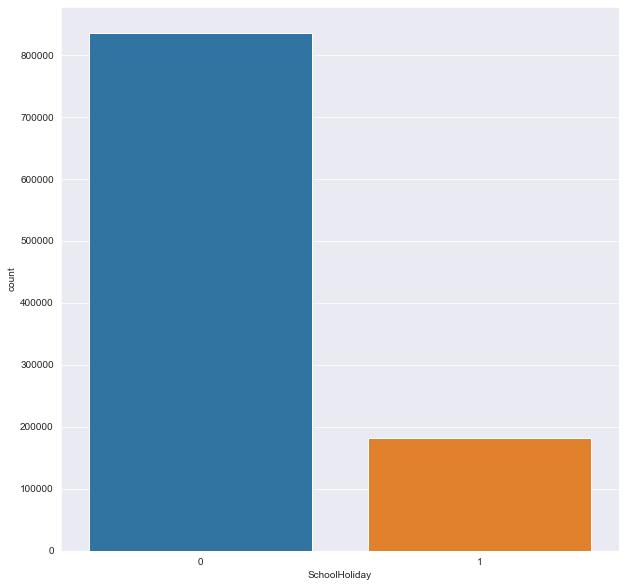

In [23]:
sns.countplot(data= merge, 
             x= "SchoolHoliday")

<AxesSubplot:xlabel='Promo', ylabel='count'>

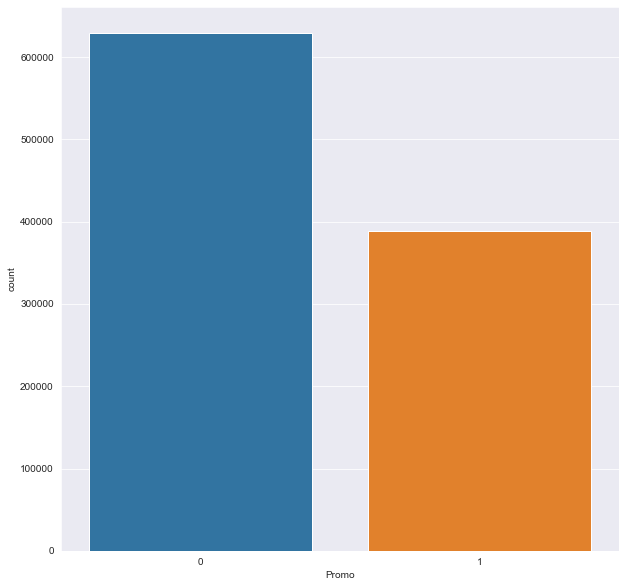

In [24]:
sns.countplot(data= merge, 
             x= "Promo")

<AxesSubplot:xlabel='Open', ylabel='count'>

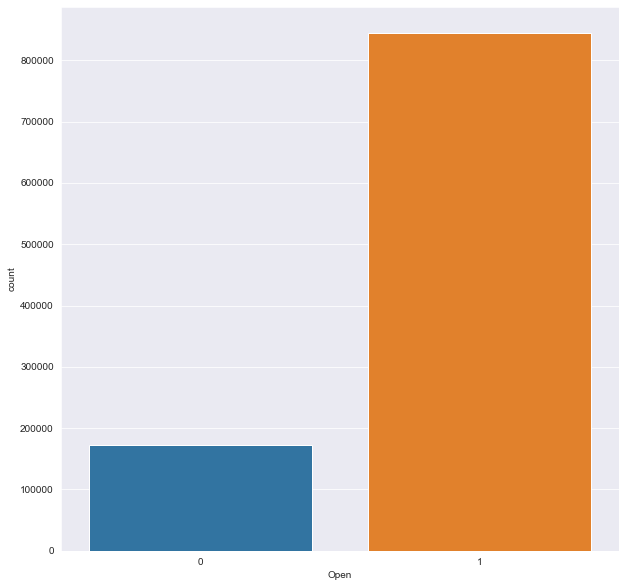

In [25]:
sns.countplot(data= merge, 
             x= "Open")

## Preprocessing and Feature Engineering

In [26]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

## Date

In [27]:
def split_date(df):
    df["Date"]= pd.to_datetime(df["Date"])
    df["Year"]= df.Date.dt.year
    df["Month"]= df.Date.dt.month
    df["Day"]= df.Date.dt.day
    df["WeekofYear"]= df.Date.dt.isocalendar().week

In [28]:
split_date(merge)
split_date(merge_test)

In [29]:
merge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekofYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


### Store Open/Closed

Next, notice that the sales are zero whenever the store is closed.

In [30]:
merge[merge.Open==0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

Instead of trying to model this relationship, it would be better to hard-code it in our predictions, and remove the rows where the store is closed. We won't remove any rows from the test set, since we need to make predictions for every row.

In [31]:
merge= merge[merge.Open== 1].copy()

### Competition

Next, we can use the columns `CompetitionOpenSince[Month/Year]` columns from `store_df` to compute the number of months for which a competitor has been open near the store.

In [32]:
def comp_months(df):
    df["CompetitionOpen"]= 12*(df.Year- df.CompetitionOpenSinceYear)
    df["CompetitionOpen"]= df["CompetitionOpen"].map(lambda x: 0 if x < 0 else x).fillna(0)

In [33]:
comp_months(merge)
comp_months(merge_test)

In [34]:
merge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekofYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,84.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,96.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,108.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,72.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,0.0


In [35]:
merge[["Date", "CompetitionDistance", "CompetitionOpenSinceYear", "CompetitionOpenSinceMonth", "CompetitionOpen"]].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
220658,2015-01-15,970.0,NaN,NaN,0.0
519964,2014-03-22,9710.0,2014.0,2.0,0.0
368093,2014-08-13,14960.0,NaN,NaN,0.0
561754,2014-02-13,170.0,2009.0,2.0,60.0
742210,2013-09-04,8240.0,2001.0,3.0,144.0
35454,2015-06-30,4450.0,NaN,NaN,0.0
915635,2013-04-02,3890.0,2006.0,11.0,84.0
890175,2013-04-24,19960.0,2006.0,3.0,84.0
989702,2013-01-25,1450.0,2005.0,4.0,96.0
420468,2014-06-20,2590.0,NaN,NaN,0.0


### Additional Promotion

We can also add some additional columns to indicate how long a store has been running `Promo2` and whether a new round of `Promo2` starts in the current month.

In [36]:
def check_promo_month(row):
    month2str= {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months= (row["PromoInterval"] or '').split(",")
        if row["Promo2Open"] and month2str[row["Month"]] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0
def promo_cols(df):
    ## Months since Promo2 was open
    df["Promo2Open"]= 12* (df.Year- df.Promo2SinceYear) + (df.WeekofYear- df.Promo2SinceWeek)* 7/30.5
    df["Promo2Open"]=  df["Promo2Open"].map(lambda x:  0 if x< 0 else x).fillna(0)* df["Promo2Open"]
    # Whether a new round of promotions was started in the current month
    df["IsPromo2Month"]= df.apply(check_promo_month, axis= 1)

In [37]:
promo_cols(merge)
promo_cols(merge_test)

In [38]:
merge[["Date", "Promo2", "Promo2SinceYear", "Promo2SinceWeek", "PromoInterval", "Promo2Open", "IsPromo2Month"]].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
874819,2013-05-08,1,2012.0,22.0,"Mar,Jun,Sept,Dec",127.949476,0
78429,2015-05-22,1,2014.0,10.0,"Mar,Jun,Sept,Dec",210.963719,0
173245,2015-02-26,1,2012.0,35.0,"Mar,Jun,Sept,Dec",901.968288,0
576060,2014-01-31,1,2013.0,31.0,"Feb,May,Aug,Nov",36.394518,0
895286,2013-04-20,0,NaN,NaN,NaN,NaN,0
949721,2013-03-02,0,NaN,NaN,NaN,NaN,0
915594,2013-04-02,0,NaN,NaN,NaN,NaN,0
223534,2015-01-12,0,NaN,NaN,NaN,NaN,0
584347,2014-01-24,0,NaN,NaN,NaN,NaN,0
616144,2013-12-26,1,2013.0,31.0,"Jan,Apr,Jul,Oct",23.229239,0


The features related to competition and promotion are now much more useful.

### Input and Target Columns

Let's select the columns that we'll use for training.

In [39]:
merge.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekofYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [40]:
input_cols= ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekofYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col= "Sales"

In [41]:
inputs= merge[input_cols].copy()
targets= merge[target_col].copy()

In [42]:
test_inputs= merge_test[input_cols].copy()

In [43]:
numeric_cols= ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekofYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

### Impute missing numerical data

In [44]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekofYear                0
dtype: int64

Seems like competition distance is the only missing value, and we can simply fill it with the highest value (to indicate that competition is very far away).

In [45]:
max_distance= inputs.CompetitionDistance.max()

In [46]:
inputs["CompetitionDistance"].fillna(max_distance, inplace= True)
test_inputs["CompetitionDistance"].fillna(max_distance, inplace= True)

### Scale Numeric Values

Let's scale numeric values to the 0 to 1 range.

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler= MinMaxScaler().fit(inputs[numeric_cols])

In [49]:
inputs[numeric_cols]= scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols]= scaler.transform(test_inputs[numeric_cols])

### Encode Categorical Columns

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

Let's one-hot encode categorical columns.

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
encoder= OneHotEncoder(sparse= False, handle_unknown= "ignore").fit(inputs[categorical_cols])
encoded_cols= list(encoder.get_feature_names_out(categorical_cols))

In [52]:
inputs[encoded_cols]= encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols]= encoder.transform(test_inputs[categorical_cols])

Finally, let's extract out all the numeric data for training.

In [53]:
x= inputs[numeric_cols + encoded_cols]
x_test= test_inputs[numeric_cols + encoded_cols]

## Gradient Boosting

In [54]:
from xgboost import XGBRegressor

In [55]:
model= XGBRegressor(random_state= 42, n_jobs= -1, n_estimators= 20, max_depth= 4)

In [56]:
%%time
model.fit(x, targets)

Wall time: 5.93 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

We can now make predictions and evaluate the model using `model.predict`.

In [57]:
preds= model.predict(x)

In [58]:
preds

array([ 7890.8364,  7394.264 ,  8265.587 , ...,  6994.0405,  8503.614 ,
       10195.775 ], dtype=float32)

### Evaluation

Let's evaluate the predictions using RMSE error.

In [59]:
from sklearn.metrics import mean_squared_error
def rmse(a,b):
    return mean_squared_error(a,b,squared= False)

In [60]:
rmse(preds, targets)

2409.809599966792

### Visualization

We can visualize individual trees using `plot_tree` (note: this requires the `graphviz` library to be installed).

In [61]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

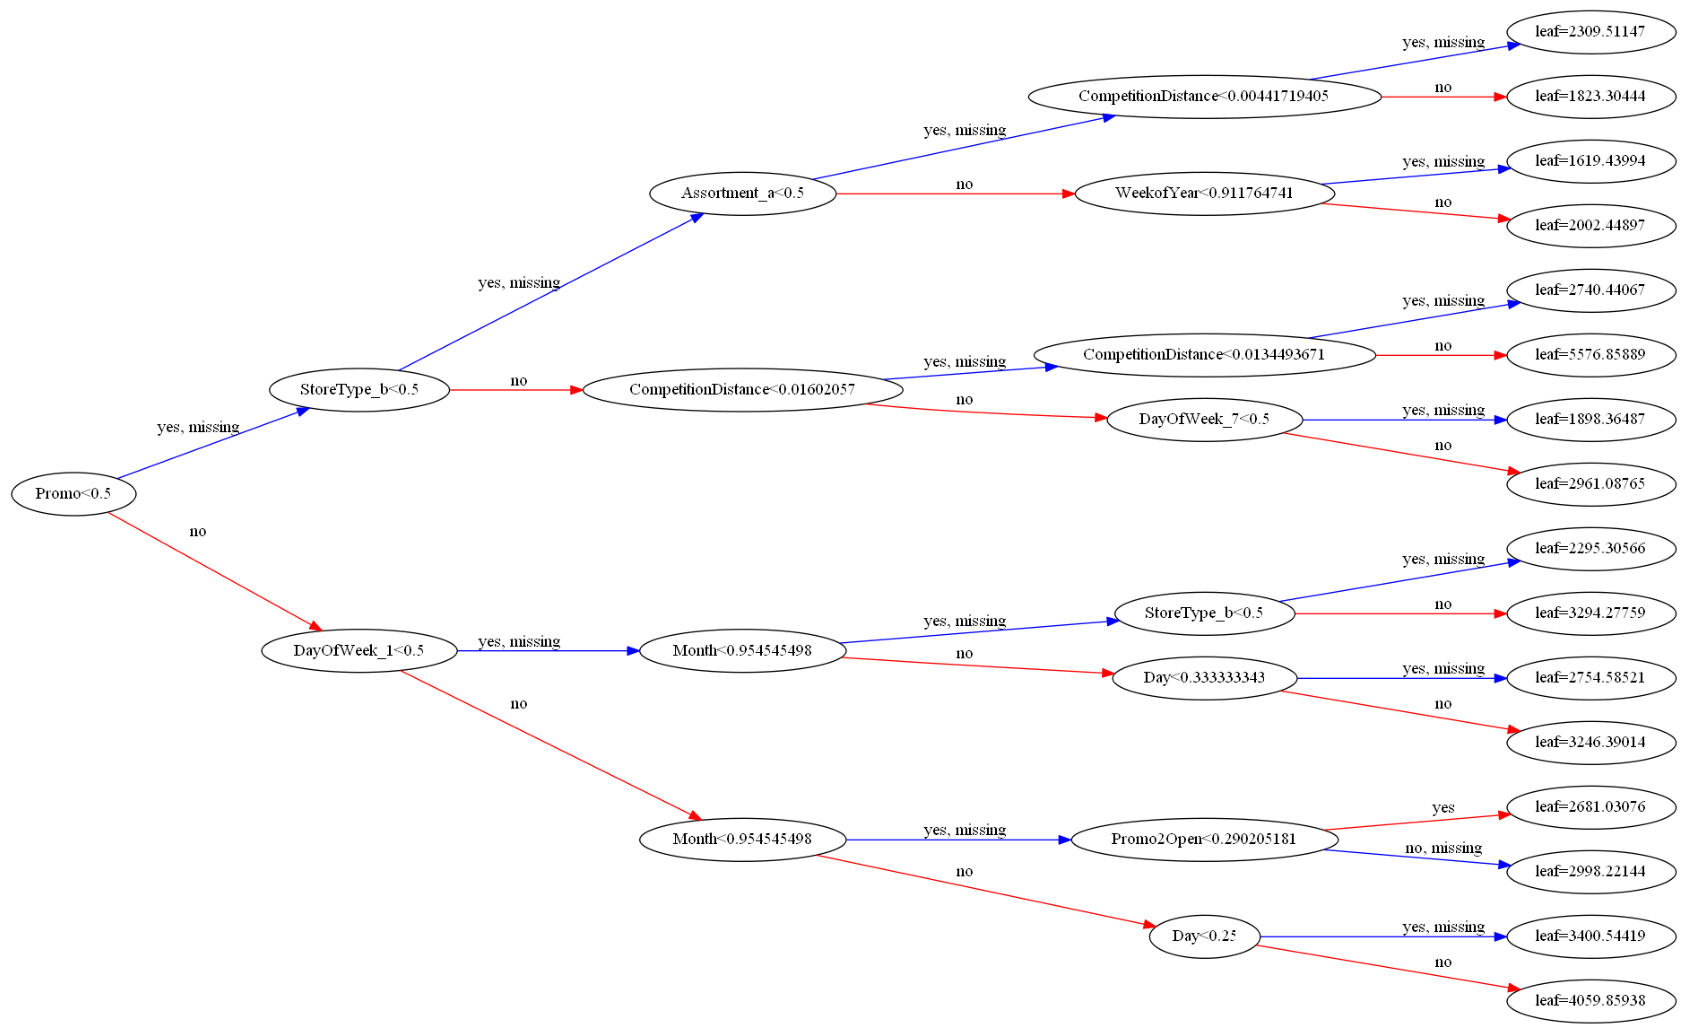

In [62]:
plot_tree(model, rankdir= "LR");

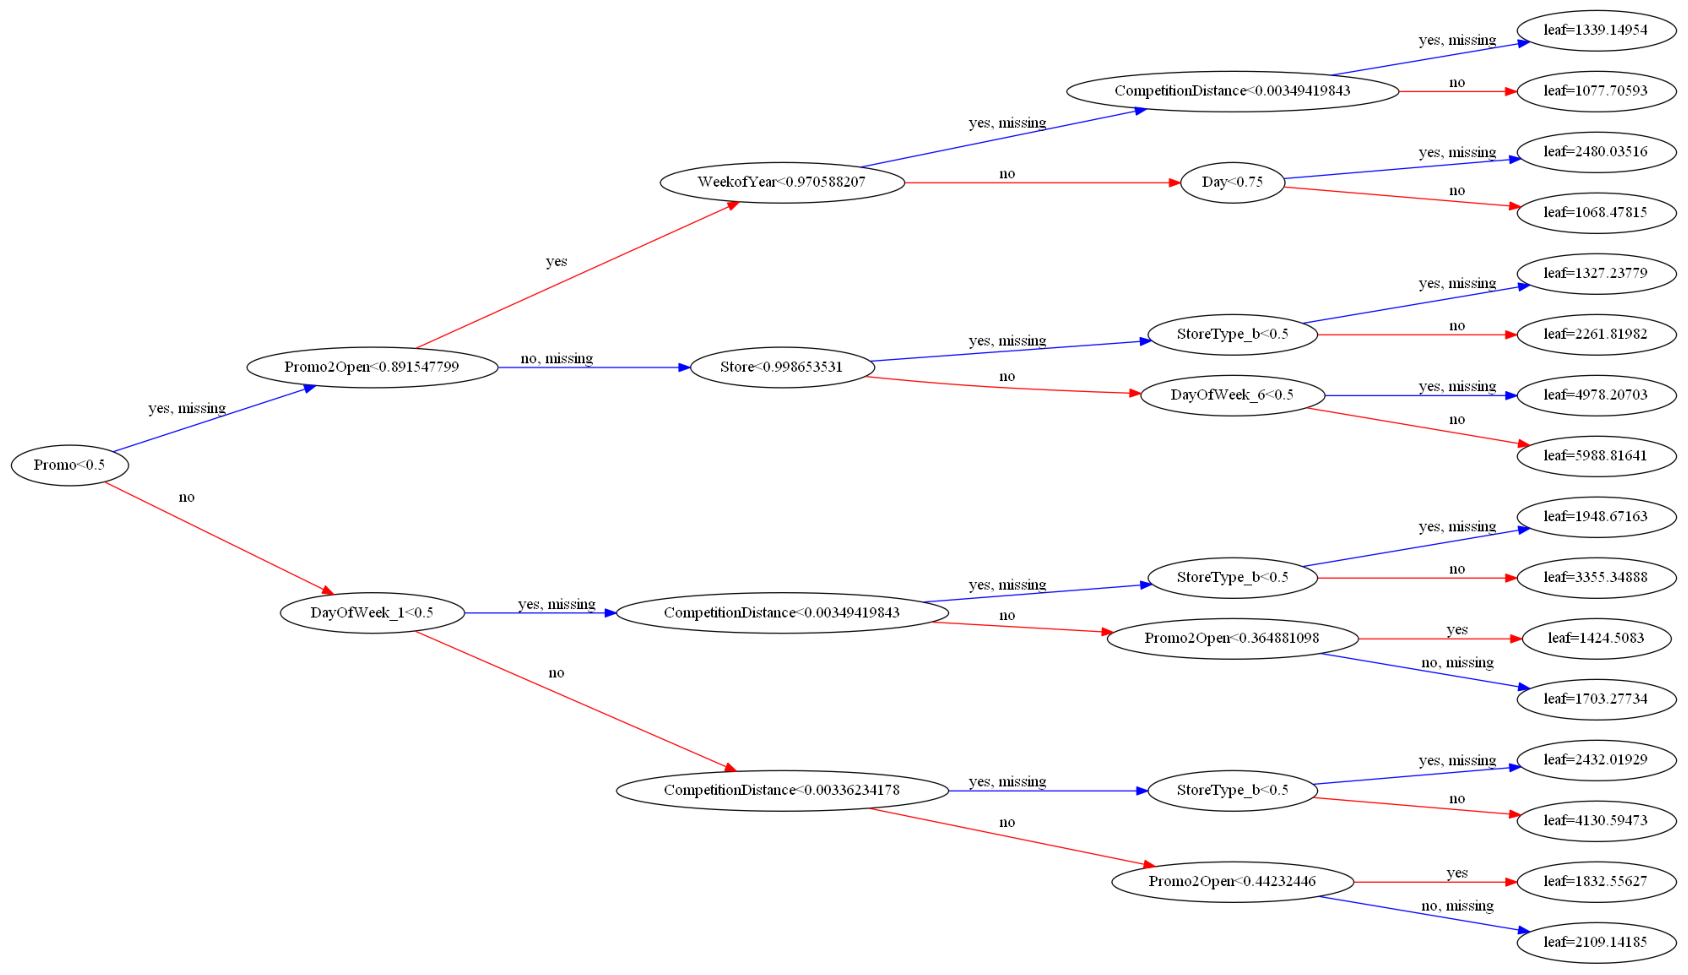

In [63]:
plot_tree(model, rankdir= "LR", num_trees= 1);

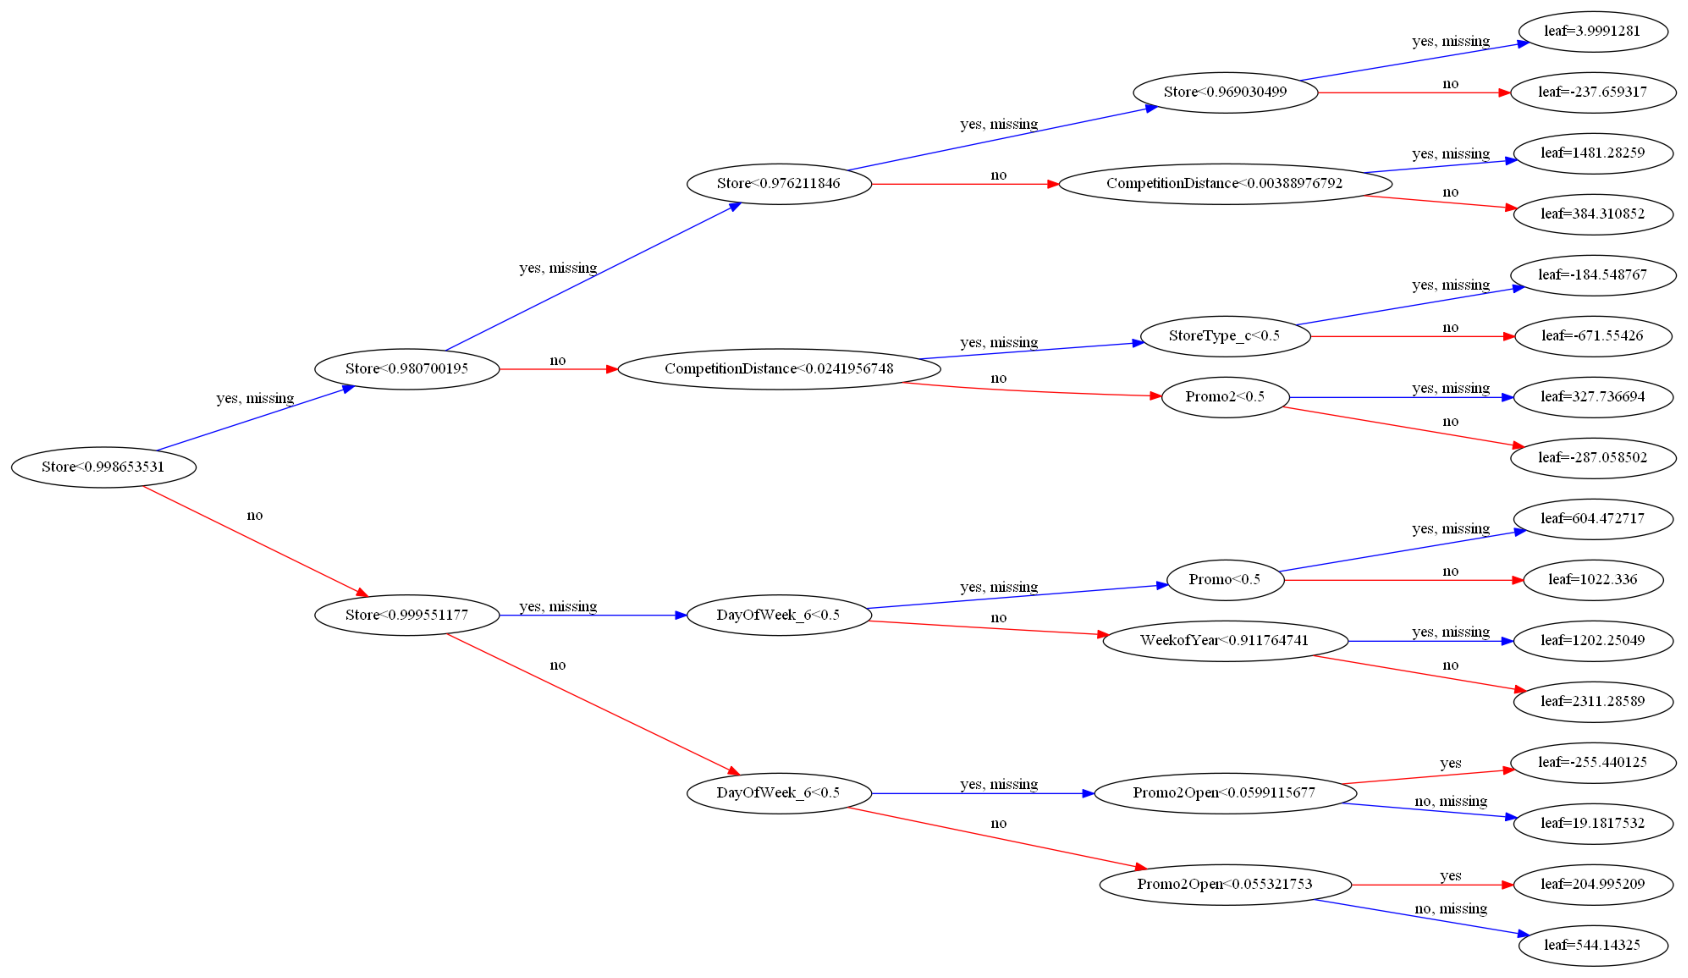

In [64]:
plot_tree(model, rankdir= "LR", num_trees= 19);

In [65]:
trees= model.get_booster().get_dump()

In [66]:
len(trees)

20

In [67]:
print(trees[0])

0:[Promo<0.5] yes=1,no=2,missing=1
	1:[StoreType_b<0.5] yes=3,no=4,missing=3
		3:[Assortment_a<0.5] yes=7,no=8,missing=7
			7:[CompetitionDistance<0.00441719405] yes=15,no=16,missing=15
				15:leaf=2309.51147
				16:leaf=1823.30444
			8:[WeekofYear<0.911764741] yes=17,no=18,missing=17
				17:leaf=1619.43994
				18:leaf=2002.44897
		4:[CompetitionDistance<0.01602057] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.0134493671] yes=19,no=20,missing=19
				19:leaf=2740.44067
				20:leaf=5576.85889
			10:[DayOfWeek_7<0.5] yes=21,no=22,missing=21
				21:leaf=1898.36487
				22:leaf=2961.08765
	2:[DayOfWeek_1<0.5] yes=5,no=6,missing=5
		5:[Month<0.954545498] yes=11,no=12,missing=11
			11:[StoreType_b<0.5] yes=23,no=24,missing=23
				23:leaf=2295.30566
				24:leaf=3294.27759
			12:[Day<0.333333343] yes=25,no=26,missing=25
				25:leaf=2754.58521
				26:leaf=3246.39014
		6:[Month<0.954545498] yes=13,no=14,missing=13
			13:[Promo2Open<0.290205181] yes=27,no=28,missing=28
				27:leaf=2681.03076
	

### Feature importance

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [68]:
importance_df= pd.DataFrame({
    "feature": x.columns,
    "importance": model.feature_importances_
}).sort_values("importance", ascending= False)

In [69]:
importance_df.head(10)

,feature,importance
1,Promo,0.376541
24,StoreType_b,0.080340
12,DayOfWeek_1,0.080100
26,StoreType_d,0.052711
3,CompetitionDistance,0.042768
0,Store,0.038036
6,Promo2Open,0.036814
27,Assortment_a,0.035874
2,SchoolHoliday,0.033735
11,WeekofYear,0.028076


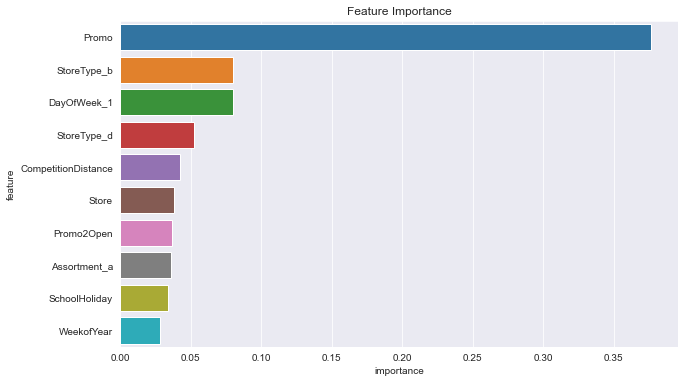

In [70]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
sns.barplot(data= importance_df.head(10), x= "importance", y= "feature");

## K Fold Cross Validation

Notice that we didn't create a validation set before training our XGBoost model. We'll use a different validation strategy this time, called K-fold cross validation ([source](https://vitalflux.com/k-fold-cross-validation-python-example/)):

![](https://vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-15-at-11.13.53-AM.png)

Scikit-learn provides utilities for performing K fold cross validation.

In [71]:
from sklearn.model_selection import KFold

Let's define a helper function `train_and_evaluate` which trains a model the given parameters and returns the trained model, training error and validation error.

In [72]:
def train_and_evaluate(x_train, train_targets, x_val, val_targets, **params):
    model= XGBRegressor(random_state= 42, n_jobs= -1, **params)
    model.fit(x_train, train_targets)
    train_rmse= rmse(model.predict(x_train), train_targets)
    val_rmse= rmse(model.predict(x_val), val_targets)
    return model, train_rmse, val_rmse

In [73]:
kfold= KFold(n_splits= 5)

In [74]:
models= []
for train_idxs, val_idxs in kfold.split(x):
    x_train, train_targets= x.iloc[train_idxs], targets.iloc[train_idxs]
    x_val, val_targets= x.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse= train_and_evaluate(x_train,
                                                   train_targets,
                                                   x_val,
                                                   val_targets,
                                                   max_depth= 4,
                                                   n_estimators= 20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2341.54816563449, Validation RMSE: 2419.7800197048064
Train RMSE: 2366.7480174512525, Validation RMSE: 2431.136455237821
Train RMSE: 2381.327148742675, Validation RMSE: 2361.868708855985
Train RMSE: 2353.048256779326, Validation RMSE: 2440.3250042970253
Train RMSE: 2321.6855566142494, Validation RMSE: 2381.9905943171048


Let's also define a function to average predictions from the 5 different models.

In [75]:
import numpy as np
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis= 0)

In [76]:
preds= predict_avg(models, x)

In [77]:
preds

array([8322.174 , 7917.1694, 8685.657 , ..., 7817.0234, 8081.4053,
       9416.783 ], dtype=float32)

We can now use `predict_avg` to make predictions for the test set.

## Hyperparameter Tuning and Regularization

Just like other machine learning models, there are several hyperparameters we can to adjust the capacity of model and reduce overfitting.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

In [78]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models= [],[],[]
    kfold= KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(x):
        x_train, train_targets= x.iloc[train_idxs], targets.iloc[train_idxs]
        val_train, val_targets= x.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse= train_and_evaluate(x_train, train_targets, x_val, val_targets)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

Since it may take a long time to perform 5-fold cross validation for each set of parameters we wish to try, we'll just pick a random 10% sample of the dataset as the validation set.

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_val, train_targets, val_targets= train_test_split(x, targets, test_size= 0.1)

In [82]:
def test_params(**params):
    model= XGBRegressor(n_jobs= -1, random_state= 42, **params)
    model.fit(x_train, train_targets)
    train_rmse= rmse(model.predict(x_train), train_targets)
    val_rmse= rmse(model.predict(x_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

#### `n_estimators`

The number of trees to be created. More trees = greater capacity of the model.

In [83]:
test_params(n_estimators= 10)

Train RMSE: 2363.9632029359736, Validation RMSE: 2375.2989107169155


In [84]:
test_params(n_estimators= 30)

Train RMSE: 1845.7139711673208, Validation RMSE: 1855.309669849993


In [85]:
test_params(n_estimators= 100)

Train RMSE: 1180.938808413945, Validation RMSE: 1189.5735044620528


In [ ]:
test_params(n_estimators= 240)

In [ ]:
def max_estimators(me):
    model= XGBRegressor(n_jobs= -1, random_state= 42, n_estimators= me)
    model.fit(x_train, train_targets)
    train_rmse= rmse(model.predict(x_train), train_targets)
    val_rmse= rmse(model.predict(x_val), val_targets)
    return('N Estimators: {}, Train RMSE: {}, Validation RMSE: {}'.format(me, train_rmse, val_rmse))

In [ ]:
estimators= pd.DataFrame([max_estimators(me) for me in range(0, 400, 100)])

In [ ]:
estimators

In [ ]:
plt.plot(estimators["N Estimators"], estimators["Train Rmse"])
plt.plot(estimators["N Estimators"], estimators["Val Rmse"])
plt.title("Train RMSE vs. Val RMSE")
plt.xticks(0,400,10)
plt.xlabel("N Estimators")
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Training", "Validation"])
plt.show()

#### `max_depth`

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [91]:
test_params(max_depth= 2)

Train RMSE: 2364.0236207158564, Validation RMSE: 2379.44953381485


In [92]:
test_params(max_depth= 5)

Train RMSE: 1400.5949222984082, Validation RMSE: 1405.9238369548152


In [93]:
test_params(max_depth= 10)

Train RMSE: 700.0920567671835, Validation RMSE: 794.7655580832495


#### `learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [94]:
test_params(n_estimators= 50, learning_rate= 0.01)

Train RMSE: 5042.151590133538, Validation RMSE: 5058.8756534221775


In [95]:
test_params(n_estimators= 50, learning_rate= 0.1)

Train RMSE: 2189.8414170477577, Validation RMSE: 2202.849831685745


In [96]:
test_params(n_estimators= 50, learning_rate= 0.3)

Train RMSE: 1563.862068016719, Validation RMSE: 1573.6227463446821


In [97]:
test_params(n_estimators= 50, learning_rate= 0.9)

Train RMSE: 1140.76392567529, Validation RMSE: 1154.6020548540716


In [98]:
test_params(n_estimators= 50, learning_rate= 0.99)

Train RMSE: 1141.1391814357255, Validation RMSE: 1152.8994907313388


#### `booster`

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

In [99]:
test_params(booster= "gblinear")

Train RMSE: 2723.6737396715043, Validation RMSE: 2734.40395967286


Clearly, a linear model is not well suited for this dataset.

## Putting it Together and Making Predictions

Let's train a final model on the entire training set with custom hyperparameters. 

In [100]:
model= XGBRegressor(n_jobs= -1, random_state= 42, n_estimators= 1000,
                   learning_rate= 0.2, max_depth= 10, subsample= 0.9,
                   colsample_bytree= 0.7)

In [101]:
%%time
model.fit(x, targets)

Wall time: 11min 15s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
test_preds= model.predict(x_test)

Let's add the predictions into `submission_df`.

In [110]:
submission["Sales"]= test_preds

Recall, however, if if the store is not open, then the sales must be 0. Thus, wherever the value of `Open` in the test set is 0, we can set the sales to 0. Also, there some missing values for `Open` in the test set. We'll replace them with 1 (open).

In [112]:
test.Open.isna().sum()

11

In [113]:
submission["Sales"]= submission["Sales"] * test.Open.fillna(1.)

In [115]:
submission

,Id,Sales
0,1,4340.546387
1,2,7891.719727
2,3,8979.767578
3,4,7568.168457
4,5,7268.210449
...,...,...
41083,41084,2582.785889
41084,41085,7950.834961
41085,41086,7161.300293
41086,41087,22942.160156


In [116]:
submission.to_csv('submission.csv', index=None)

In [117]:
from IPython.display import FileLink

In [118]:
FileLink("submission.csv")

C:\Users\user\submission.csv